<a href="https://colab.research.google.com/github/whajji1026/Vehicles-tracking-and-counting/blob/main/Colors_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from collections import Counter
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow

In [34]:
def rgb_to_hex(rgb_color):
  hex_color="#"
  for i in rgb_color:
    i=int(i)
    hex_color+=("{:02x}".format(i))
  return hex_color

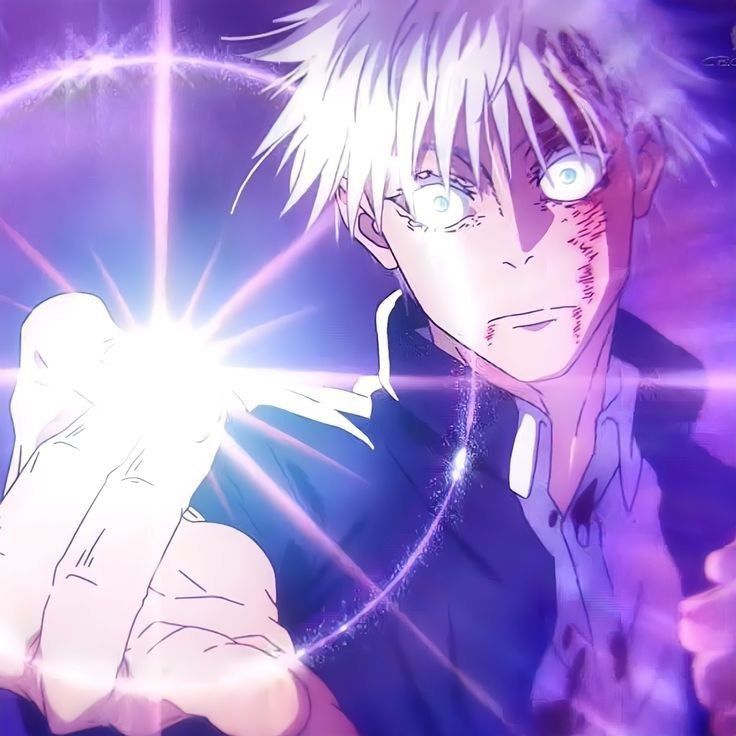

In [35]:
path="/content/𝐆𝐨𝐣𝐨𝐮 𝐢𝐜𝐨𝐧𝐬.jpg"
rawimage = cv2.imread(path)
cv2_imshow(rawimage)
rawimage = cv2.cvtColor(rawimage, cv2.COLOR_BGR2RGB)

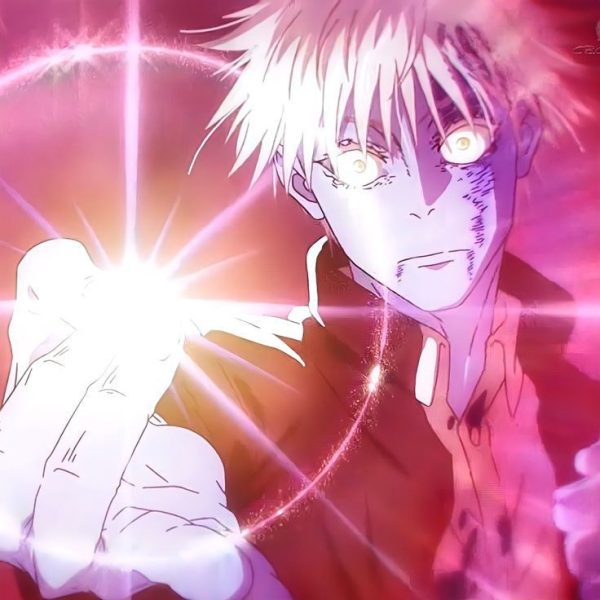

In [36]:
img=cv2.resize(rawimage ,(600,600),interpolation=cv2.INTER_AREA)
img.shape
cv2_imshow(img)

In [37]:
img=img.reshape(img.shape[0]*img.shape[1],3)
img.shape

(360000, 3)

In [38]:
img

array([[132,  77, 194],
       [132,  77, 194],
       [131,  76, 193],
       ...,
       [131,  44, 148],
       [133,  48, 150],
       [136,  51, 152]], dtype=uint8)

In [39]:
clf = KMeans(n_clusters=5)
color_labels = clf.fit_predict(img)
center_colors = clf.cluster_centers_
counts = Counter(color_labels)
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['#a281de', '#432d9d', '#8355c3', '#faeff8', '#d3b0e7']


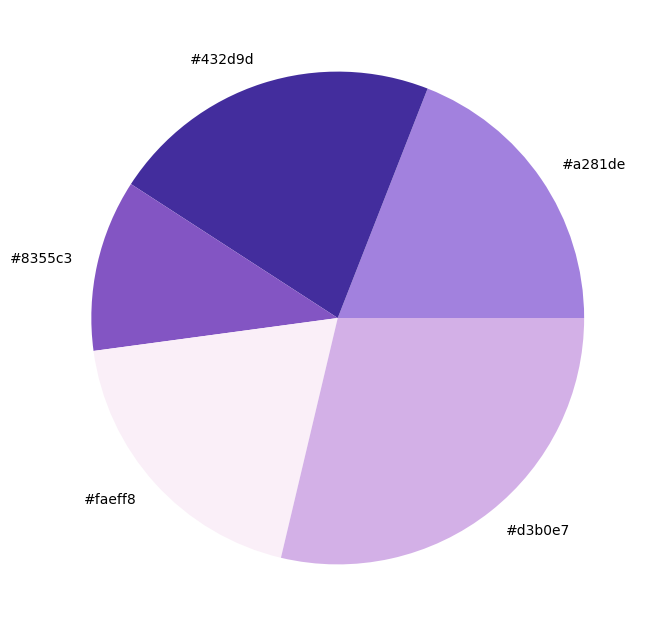

In [40]:
plt.figure(figsize=(12,8))
plt.pie(counts.values(), labels= hex_colors, colors= hex_colors)
plt.savefig(f"{path[:-4]}-analysis.png")
print(hex_colors)